In [187]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [188]:
#adjusting view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [189]:
# application_data.csv is in the same folder as the Jupiter Notebook
# importing data
application_data_DF = pd.read_csv("Credit EDA Case Study-20230227T070234Z-001/Credit EDA Case Study/application_data.csv")
application_data_DF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [190]:
# Check the shape of the dataframe
application_data_DF.shape

(307511, 122)

In [191]:
# Check the datatypes of all the columns of the dataframe
# application_data_DF.info()
# to show all the column names
application_data_DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [192]:
# analyze values for all columns
application_data_DF.describe()

# some columns have negative values like DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH etc. which seems to be incorrect.
# further analsis required.

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [193]:
#Check the number of null values in the columns
#application_data_DF.isnull().sum()
#calculating percentage of null Value 
application_data_DF_col_perc = (application_data_DF.isnull().sum() / application_data_DF.shape[0] * 100.00)

application_data_DF_missing_40 = application_data_DF_col_perc[application_data_DF_col_perc>40]

application_data_DF_missing_40

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [194]:
#remove all columns having missing values > 40 % as they wont provide correct insights
application_data_DF.drop(columns=application_data_DF_missing_40.index, inplace=True)

In [195]:
#recheck shape of application_data_DF
application_data_DF.shape

(307511, 73)

In [196]:
application_data_DF_col_perc[(application_data_DF_col_perc<40) & (application_data_DF_col_perc>0)]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [197]:
#taking care of OCCUPATION_TYPE
#OCCUPATION_TYPE has a high perc of missing values and imputing them with any existing occupation type may impact analysis
application_data_DF.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [198]:
#Assigning new value 'Unknown' for OCCUPATION_TYPE
application_data_DF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 
#verifying new value
application_data_DF.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

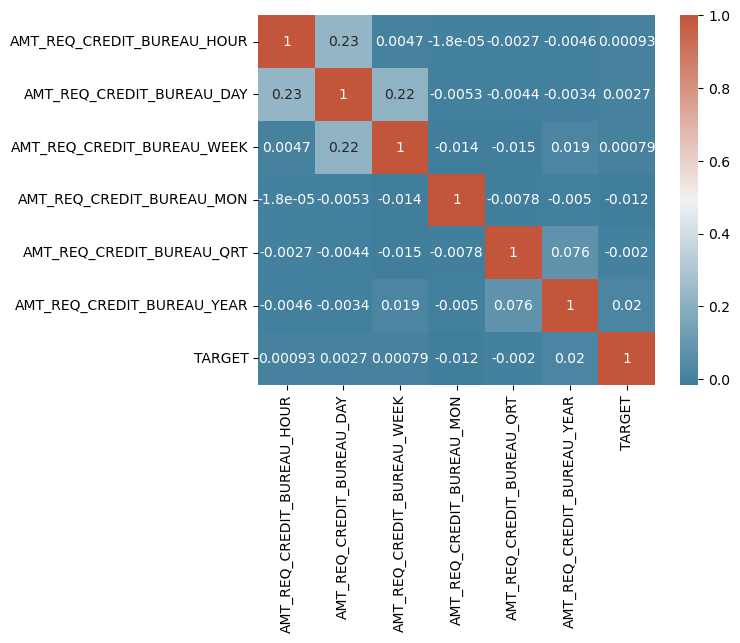

In [199]:
#taking care of AMT_REQ_CREDIT_BUREAU_X
# Checking correlation of AMT_REQ_CREDIT_BUREAU_X columns vs TARGET column
amt_req_credit_matrix = application_data_DF[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY",
                              "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
                              "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","TARGET"]]
amt_req_credit_matrix_corr = amt_req_credit_matrix.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(amt_req_credit_matrix_corr,
            xticklabels=amt_req_credit_matrix_corr.columns,
            yticklabels=amt_req_credit_matrix_corr.columns,
            annot = True,
            cmap =cmap)

#AMT_REQ_CREDIT_BUREAU_X can be deleted as there is no corelation between these variables and the target column.

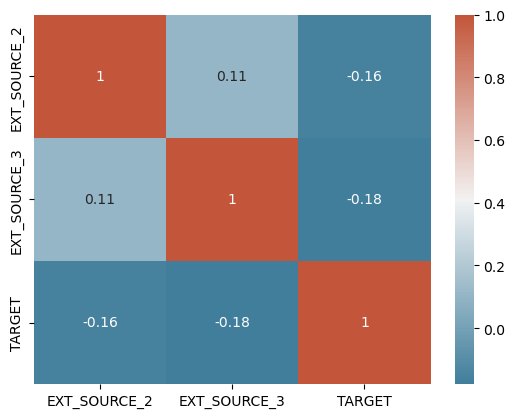

In [200]:
#taking care of EXT_SOURCE_X
#Checking correlation of EXT_SOURCE_X columns vs TARGET column
ext_src_matrix =  application_data_DF[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
ext_src_matrix_corr = ext_src_matrix.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(ext_src_matrix_corr,
            xticklabels=ext_src_matrix_corr.columns,
            yticklabels=ext_src_matrix_corr.columns,
            annot = True,
            cmap =cmap)

#EXT_SOURCE_X can be deleted as there is no corelation between these variables and the target column.

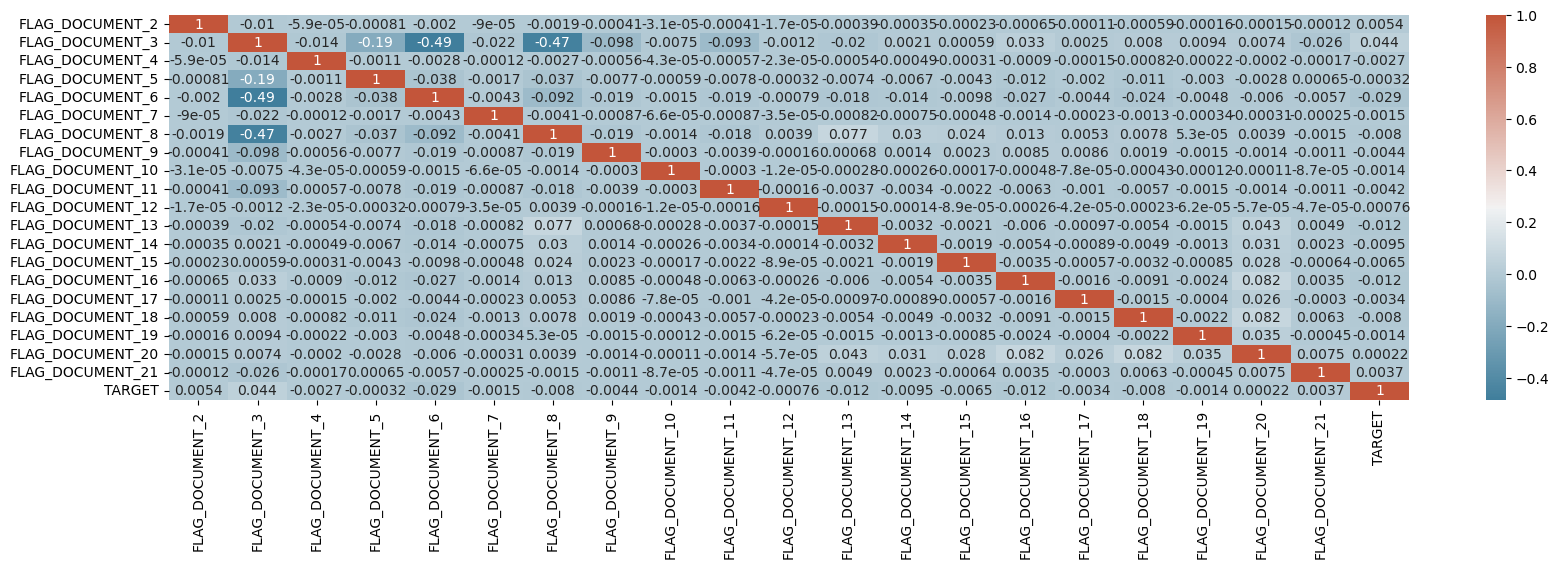

In [201]:
#taking care of FLAG_DOCUMENT_X
#Checking correlation of FLAG_DOCUMENT_X columns vs TARGET column
flag_matrix = application_data_DF[[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'TARGET']]
flag_matrix_corr = flag_matrix.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (20,5))
ax = sns.heatmap(flag_matrix_corr,
            xticklabels=flag_matrix_corr.columns,
            yticklabels=flag_matrix_corr.columns,
            annot = True,
            cmap =cmap)

# the FLAG_DOCUMENT_X can be dropped as there is no corelation between these variables and the target column.

In [202]:
# dropping irrelevant columns from the dataframe including FLAG_DOCUMENT_X & EXT_SOURCE_X & AMT_REQ_CREDIT_BUREAU_X
drop_cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',"EXT_SOURCE_2","EXT_SOURCE_3",
 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
             "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY",
                              "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
                              "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"
]

application_data_DF.drop(columns=drop_cols, inplace=True)

In [203]:
#recheck shape of application_data_DF
application_data_DF.shape

(307511, 39)

In [204]:
application_data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [205]:
#checking Gender coulmn
application_data_DF['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [206]:
#assigning the mode to the 'XNA' rows of Gender
application_data_DF.loc[(application_data_DF['CODE_GENDER']=='XNA'), 'CODE_GENDER']=application_data_DF['CODE_GENDER'].mode()[0]
application_data_DF['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [207]:
# continuing analysis
# some columns have negative values like DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH etc. which seems to be incorrect.
application_data_DF[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


In [208]:
#converting days column values to +ve
days_col= ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
for col in days_col:
    application_data_DF[col] = abs(application_data_DF[col])
    
#verifying
application_data_DF[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458


In [209]:
# Calculating Age 
application_data_DF['AGE'] = application_data_DF['DAYS_BIRTH'] // 365
application_data_DF['AGE'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [210]:
#Creating bins for Age
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

application_data_DF['AGE_GROUP']=pd.cut(application_data_DF['AGE'],bins=bins,labels=slots)
application_data_DF['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

In [211]:
# Calculating Work Experience 
application_data_DF['WORK_EXPERIENCE'] = application_data_DF['DAYS_EMPLOYED'] // 365


In [212]:
#Creating bins for Work Experience 
bins = [0,5,10,20,30,40,50,100]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50 above']

application_data_DF['WORK_EXPERIENCE_GROUP']=pd.cut(application_data_DF['WORK_EXPERIENCE'],bins=bins,labels=slots)
application_data_DF['WORK_EXPERIENCE_GROUP'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50 above     0.000000
Name: WORK_EXPERIENCE_GROUP, dtype: float64

In [213]:
#Creating bins for AMT_INCOME_TOTAL

application_data_DF['AMT_INCOME_TOT']=application_data_DF['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

application_data_DF['AMT_INCOME_TOTAL_GROUP']=pd.cut(application_data_DF['AMT_INCOME_TOT'],bins=bins,labels=slots)
application_data_DF['AMT_INCOME_TOTAL_GROUP'].value_counts(normalize=True)*100

100K-200K    50.697218
200k-300k    21.194896
0-100K       20.714258
300k-400k     4.772559
400k-500k     1.743369
500k-600k     0.356088
600k-700k     0.282594
800k-900k     0.096908
1M Above      0.080323
700k-800k     0.052682
900k-1M       0.009105
Name: AMT_INCOME_TOTAL_GROUP, dtype: float64

In [214]:
#Creating bins for AMT_CREDIT

application_data_DF['AMT_CREDIT_DIV']=application_data_DF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

application_data_DF['AMT_CREDIT_GROUP']=pd.cut(application_data_DF['AMT_CREDIT_DIV'],bins=bins,labels=slots)
application_data_DF['AMT_CREDIT_GROUP'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_GROUP, dtype: float64

In [215]:
# previous_application.csv is in the same folder as the Jupiter Notebook
# importing data
previous_application_DF = pd.read_csv("Credit EDA Case Study-20230227T070234Z-001/Credit EDA Case Study/previous_application.csv")
previous_application_DF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
# Check the shape of the dataframe
previous_application_DF.shape

(1670214, 37)

In [217]:
# Check the datatypes of all the columns of the dataframe
previous_application_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [218]:
#Check the number of null values in the columns

#calculating percentage of null Value 
previous_application_DF_col_perc = (previous_application_DF.isnull().sum() / previous_application_DF.shape[0] * 100.00)

previous_application_DF_missing_40 = previous_application_DF_col_perc[previous_application_DF_col_perc>40]

previous_application_DF_missing_40

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [219]:
#remove all columns having missing values > 40 % as they wont provide correct insights
previous_application_DF.drop(columns=previous_application_DF_missing_40.index, inplace=True)


In [220]:
# dropping irrelevant columns from the dataframe including FLAG_DOCUMENT_X & EXT_SOURCE_X & AMT_REQ_CREDIT_BUREAU_X
drop_cols = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'
]

previous_application_DF.drop(columns=drop_cols, inplace=True)

In [221]:
previous_application_DF.shape

(1670214, 22)

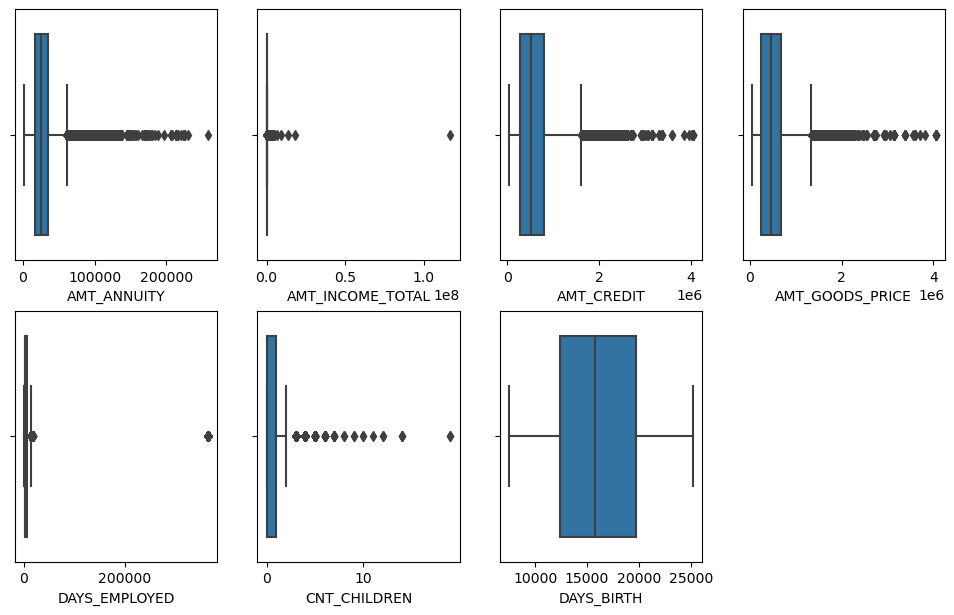

In [222]:
#outliers in application_data_DF

plt.figure(figsize=(12,15))

app_outlier = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE',
                     'DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']

for i in enumerate(app_outlier):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=application_data_DF[i[1]])


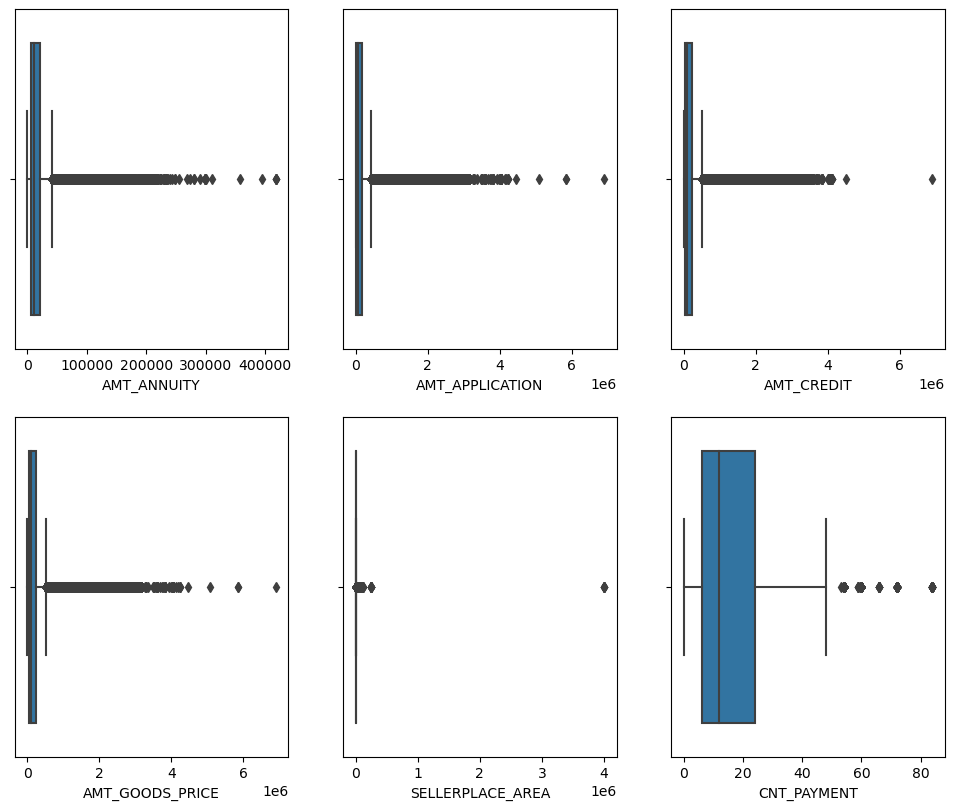

In [223]:
#outliers in previous_application_DF

plt.figure(figsize=(12,15))

prev_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                     'SELLERPLACE_AREA','CNT_PAYMENT']
for i in enumerate(prev_outlier):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=previous_application_DF[i[1]])


In [ ]:
#UNIVARIATE ANALYSIS

In [224]:
#segmenting data based on target. 
#creating 2 different dataframes based on target value
application_data_DF_0 = application_data_DF[application_data_DF['TARGET']==0]
application_data_DF_1 = application_data_DF[application_data_DF['TARGET']==1]

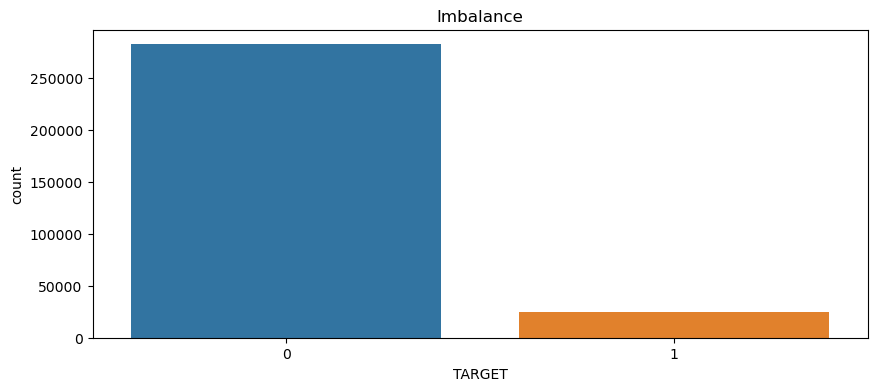

In [260]:
#imbalance

plt.figure(figsize=(10,4))
sns.countplot(application_data_DF['TARGET'])
plt.title("Imbalance")
plt.show()


In [258]:
#ratio of repayer to default = 11 => for every 1 defaulter there are 11 repayers.
ratio = application_data_DF_0.shape[0] // application_data_DF_1.shape[0]
ratio

11

In [225]:
def univariateAnalysis(feature, split):
    
    if split:
        fig, (ax1, ax2) = plt.subplots(nrows =2, ncols=1, figsize=(12,16))
    else :   
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

    ax1 = sns.countplot(ax=ax1,data=application_data_DF_0,x=feature)
    ax1.set_title("With no payment difficulties", fontsize=10)
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Number of Loans")

    ax2 = sns.countplot(ax=ax2,data=application_data_DF_1,x=feature)
    ax2.set_title("With payment difficulties",fontsize=10)
    ax2.set_xlabel(feature)
    ax2.set_ylabel("Number of Loans")
    plt.show()

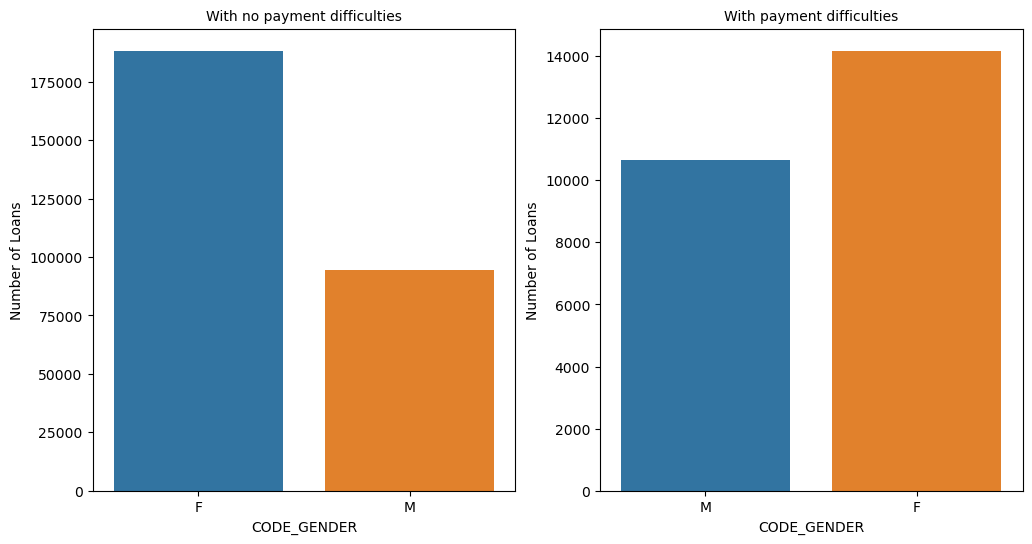

In [226]:
#univariate analysis of CODE_GENDER
univariateAnalysis('CODE_GENDER', False)

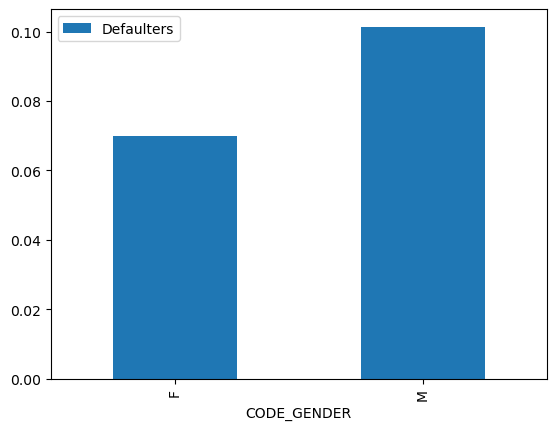

In [227]:
#CODE_GENDER vs DEFAULTERS
application_data_DF.groupby(['CODE_GENDER'])['TARGET'].mean().plot.bar()
plt.legend(['Defaulters'])
plt.show()

In [261]:
#### Insight
### Women are likely to repay than men - Women take significantly higher number of loans but default much lesser.

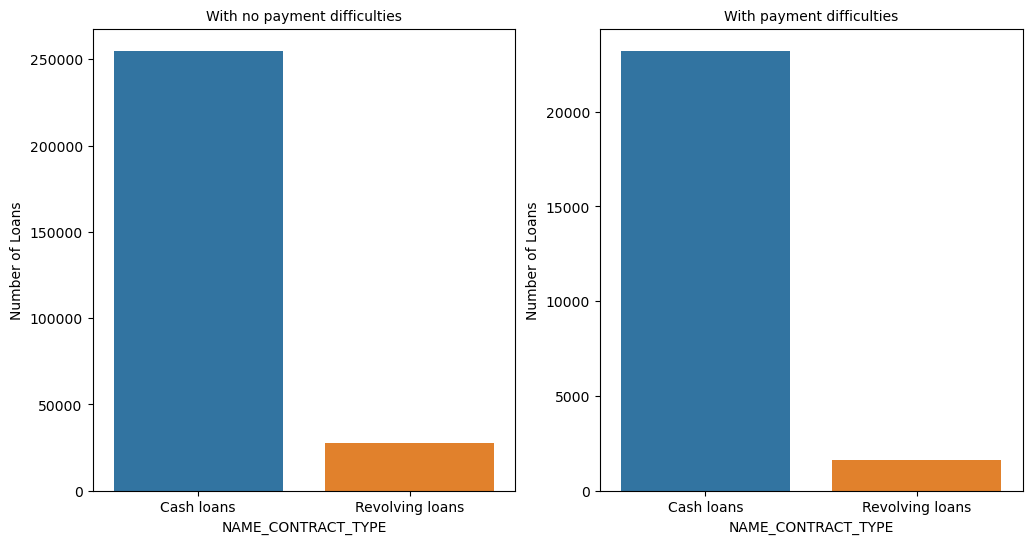

In [228]:
#univariate analysis of NAME_CONTRACT_TYPE
univariateAnalysis('NAME_CONTRACT_TYPE', False)

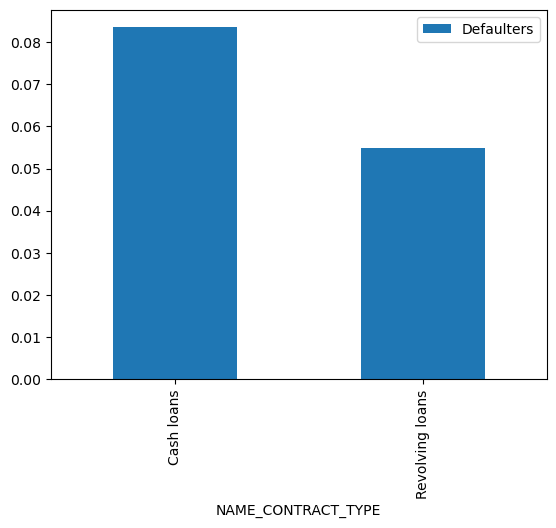

In [229]:
#NAME_CONTRACT_TYPE vs DEFAULTERS
application_data_DF.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.bar()
plt.legend(['Defaulters'])
plt.show()

In [263]:
#### Insight
### Revolving loans are defaulted more - they are much lesser in number than cash loans but have significant number of default cases compared to cash loans.

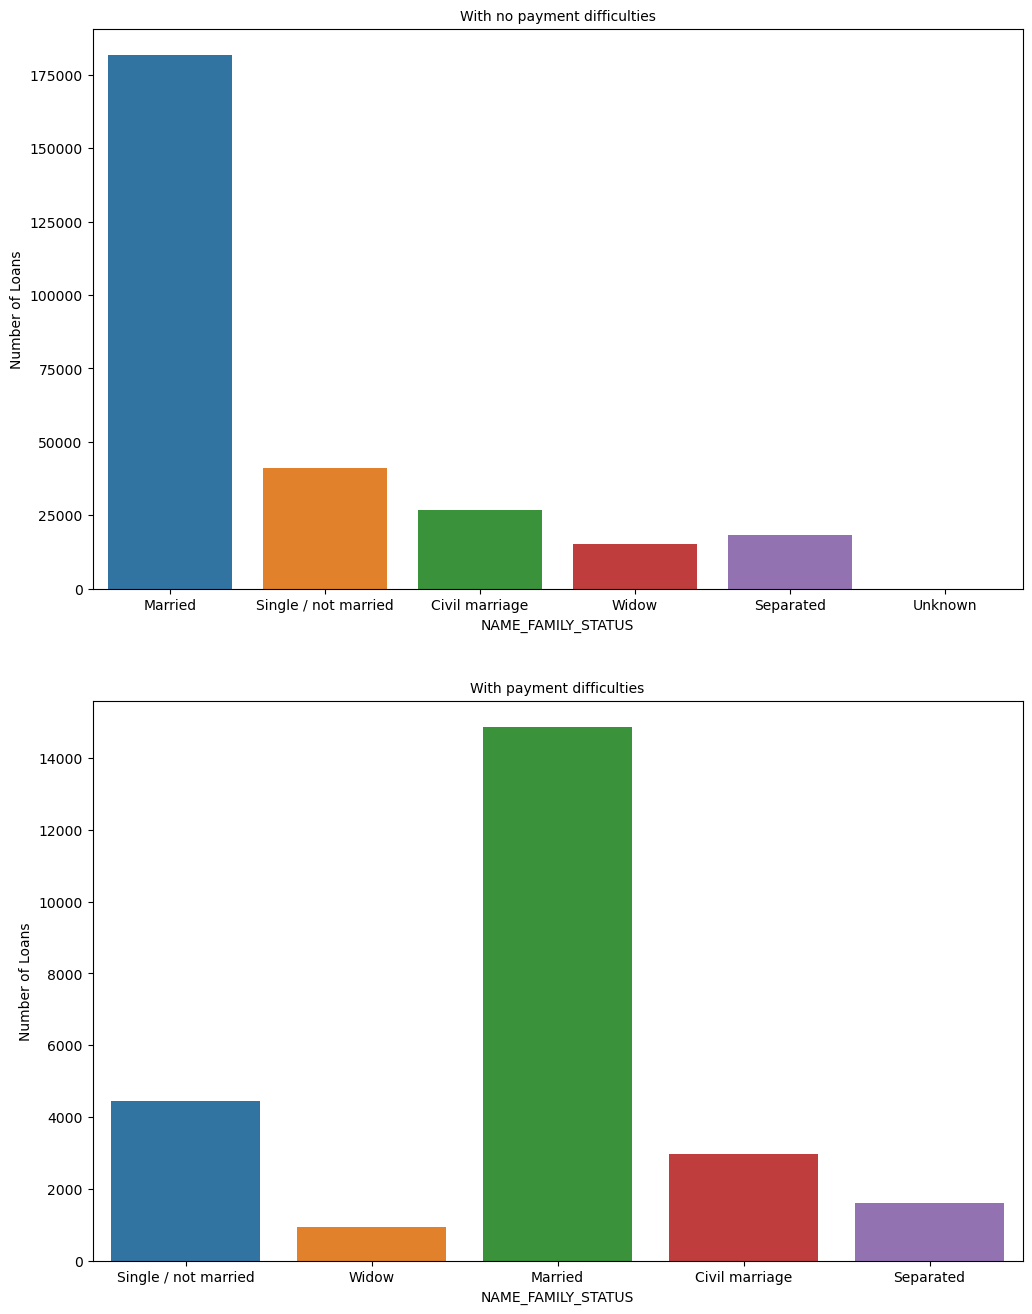

In [230]:
#univariate analysis of NAME_FAMILY_STATUS

univariateAnalysis('NAME_FAMILY_STATUS', True)

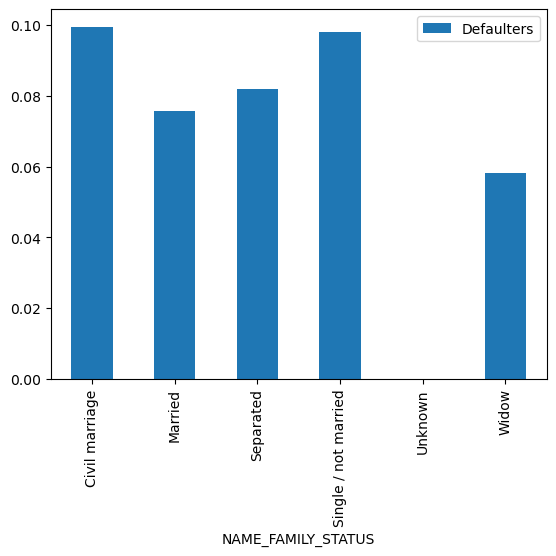

In [231]:
#univariate analysis of NAME_FAMILY_STATUS vs DEFAULTERS
application_data_DF.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.bar()
plt.legend(['Defaulters'])


plt.show()

In [264]:
####Insights
###Civil marriage couples and Single/unmarried are likely to default more.


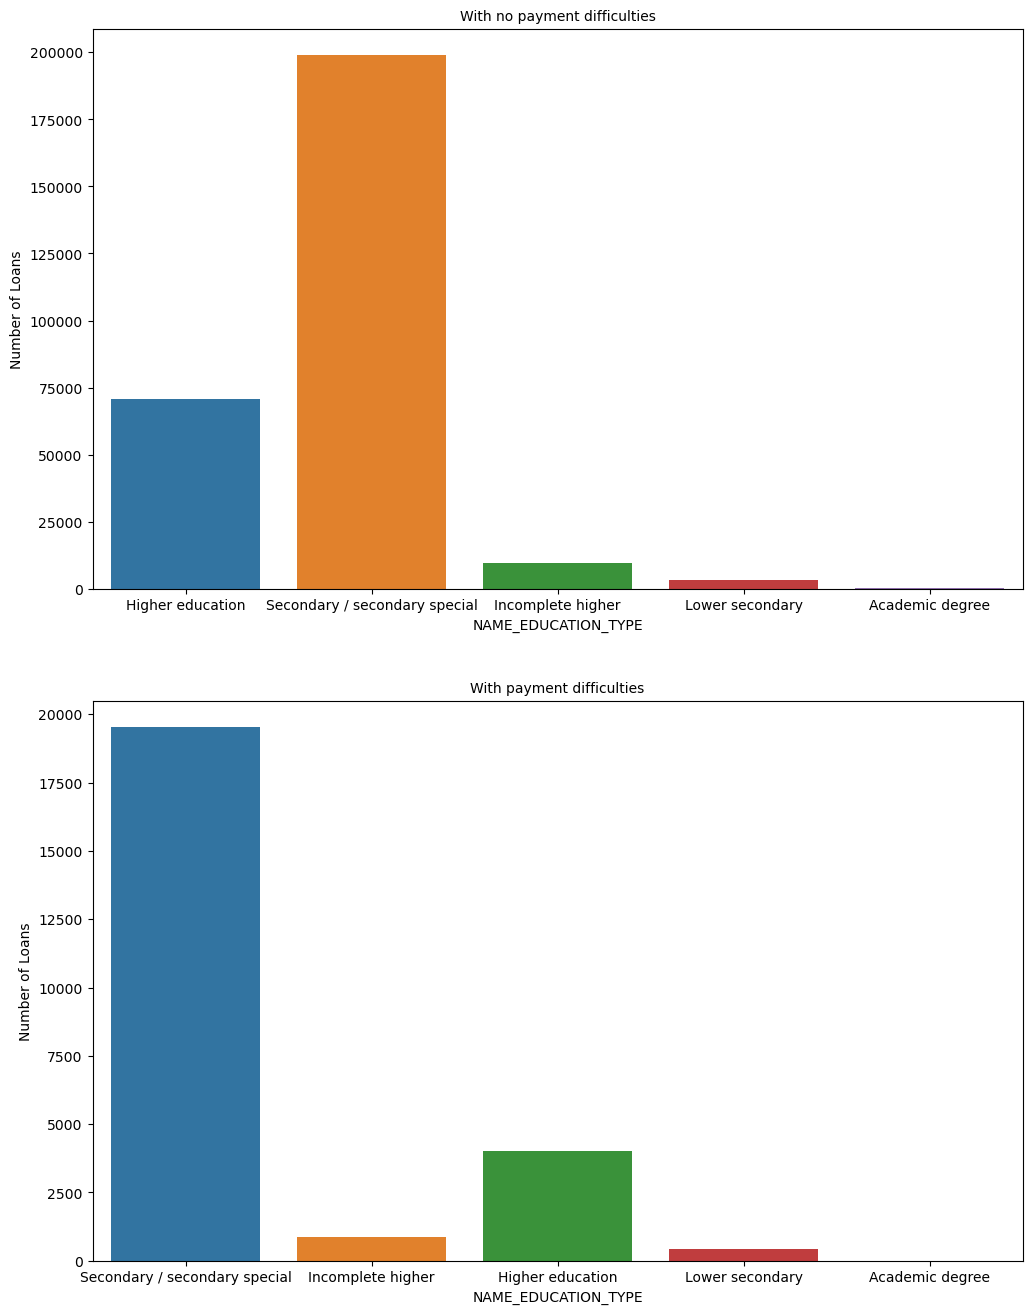

In [232]:
#univariate analysis of NAME_EDUCATION_TYPE
univariateAnalysis('NAME_EDUCATION_TYPE', True)

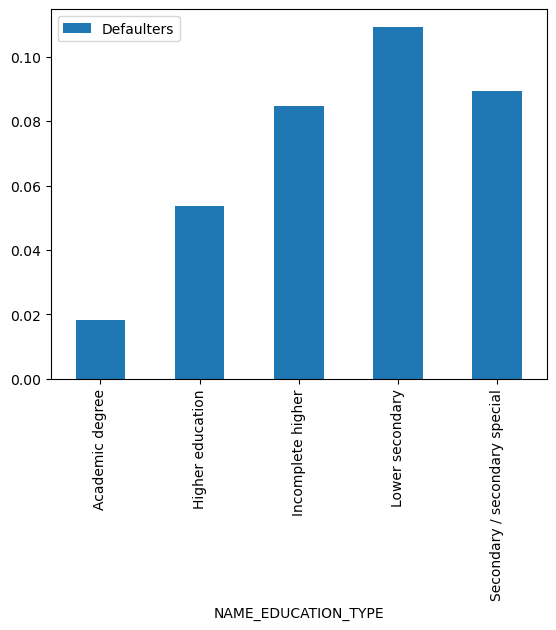

In [233]:
#NAME_EDUCATION_TYPE vs DEFAULTERS
application_data_DF.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.legend(['Defaulters'])
plt.show()

In [265]:
####Insights
###Applicants who have not completed their higher education are likely to default.


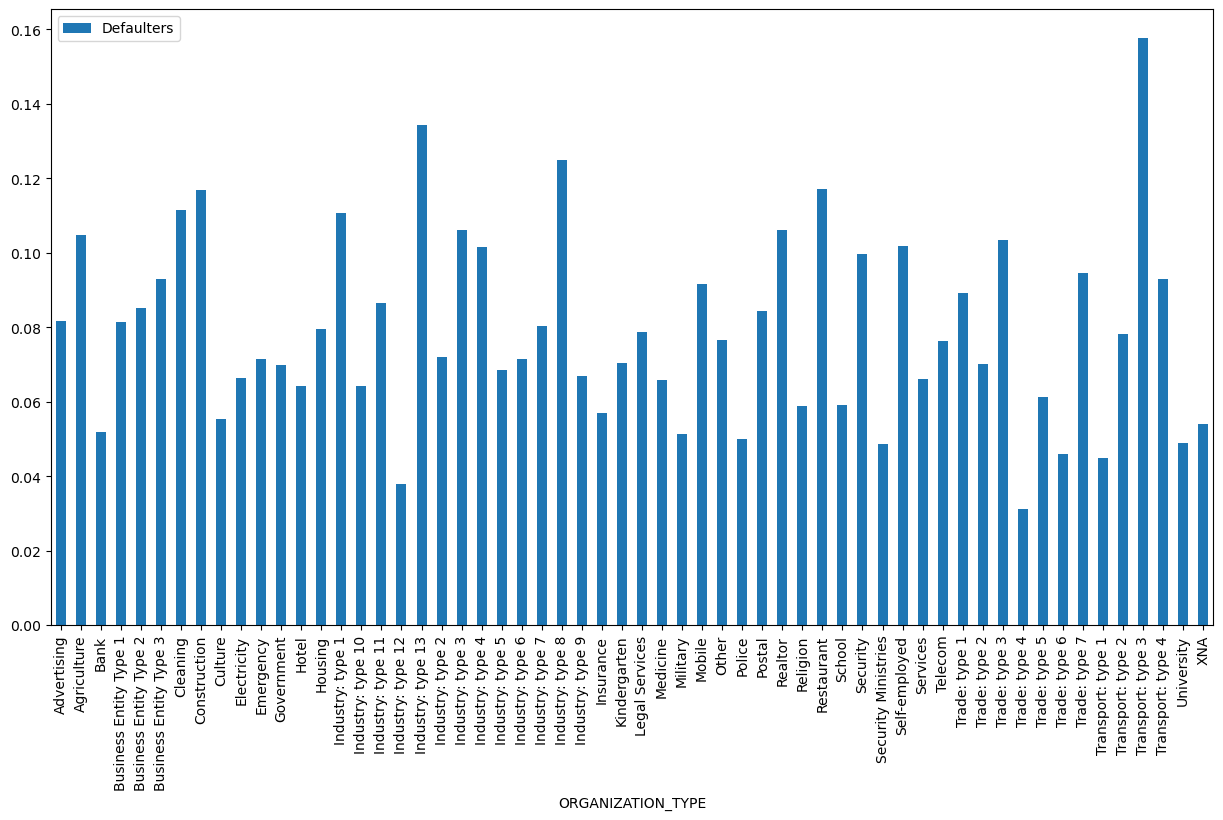

In [234]:

#ORGANIZATION_TYPE vs DEFAULTERS
plt.figure(figsize=(15,8))
application_data_DF.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().plot.bar()

plt.legend(['Defaulters'])
plt.show()

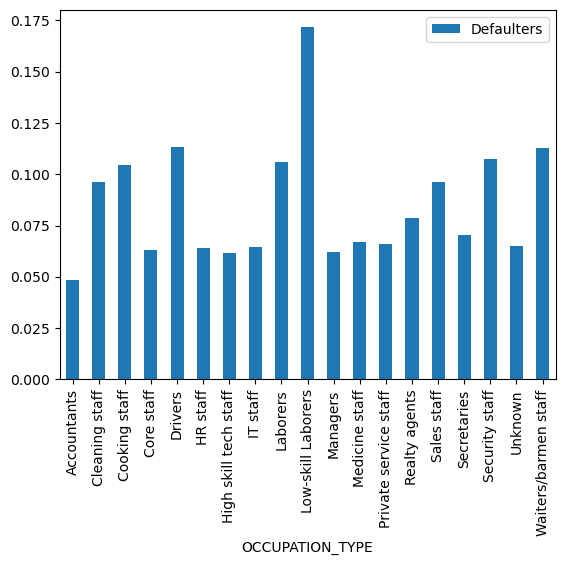

In [235]:

#univariate analysis of OCCUPATION_TYPE vs DEFAULTERS
application_data_DF.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.bar()
plt.legend(['Defaulters'])
plt.show()

In [266]:
####Insights
###Low-skill labourers have the highest chance of defaulting

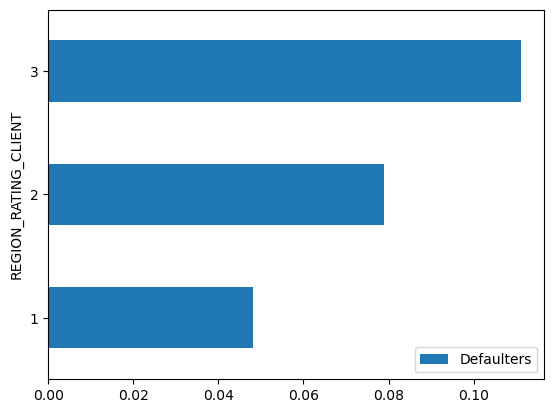

In [236]:

#univariate analysis of REGION_RATING_CLIENT vs DEFAULTERS
application_data_DF.groupby(['REGION_RATING_CLIENT'])['TARGET'].mean().plot.barh()
plt.legend(['Defaulters'])
plt.show()

In [267]:
####Insights
###People who live in region with rating 3 have very high default rating.

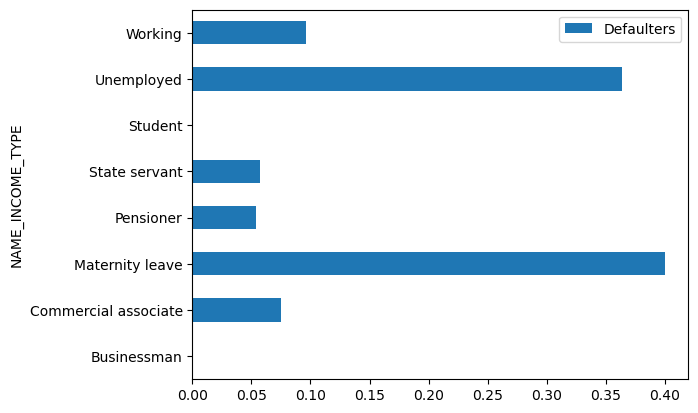

In [268]:

#univariate analysis of NAME_INCOME_TYPE vs DEFAULTERS
application_data_DF.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.legend(['Defaulters'])
plt.show()

In [269]:
####Insights
###Unemployed and maternity leave applicants are the highest defaulters.

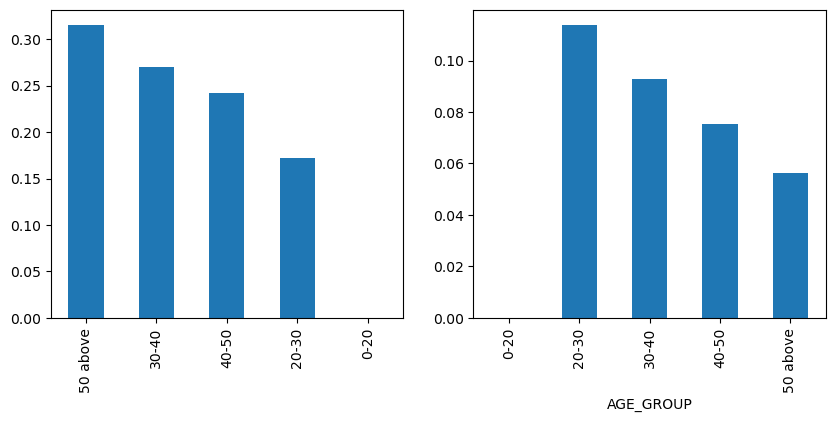

In [251]:
#univariate analysis of AGE GROUP vs DEFAULTERS
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
application_data_DF.AGE_GROUP.value_counts(normalize= True).plot.bar()
plt.subplot(1,2,2)
application_data_DF.groupby(["AGE_GROUP"])['TARGET'].mean().plot.bar()
plt.show()

In [270]:
####Insights
###People in age group 20-30 are most likely to default and > 50 are least likely to default

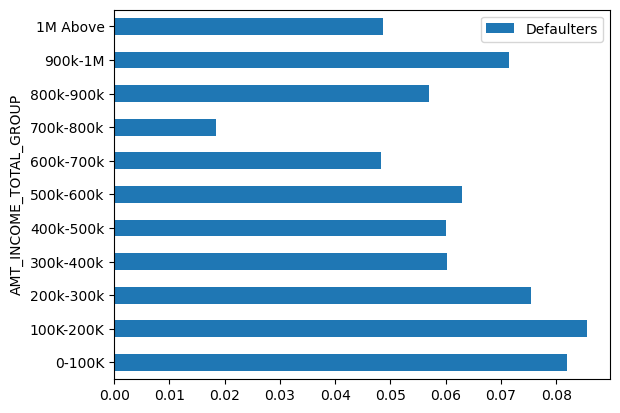

In [239]:

#univariate analysis of AMT_INCOME_TOTAL_GROUP vs DEFAULTERS
application_data_DF.groupby(['AMT_INCOME_TOTAL_GROUP'])['TARGET'].mean().plot.barh()
plt.legend(['Defaulters'])
plt.show()

In [ ]:
####Insights
###People in income range < 300k have a high likelihood of defaulting

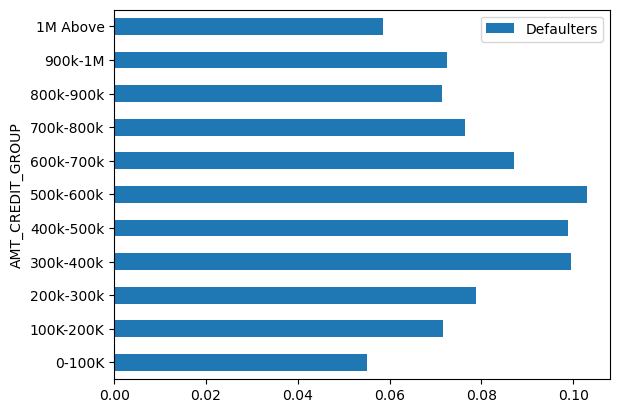

In [240]:
#univariate analysis of AMT_CREDIT_GROUP vs DEFAULTERS
application_data_DF.groupby(['AMT_CREDIT_GROUP'])['TARGET'].mean().plot.barh()
plt.legend(['Defaulters'])
plt.show()

In [271]:
####Insights
###People who get loan for 300-600k tend to default more than others.

In [245]:
#Bivariate Analysis

def bivariate_analysis(x,y):
    
    plt.figure(figsize=(20,8)) 

    plt.subplot(1,2,1)
    ax = sns.scatterplot(data=application_data_DF_0, x=x,y=y)
    plt.title('Customer without payment difficulties')

    plt.subplot(1,2,2)
    ax = sns.scatterplot(data=application_data_DF_1, x=x,y=y)
    plt.title('Customer with payment difficulties')
    plt.show()

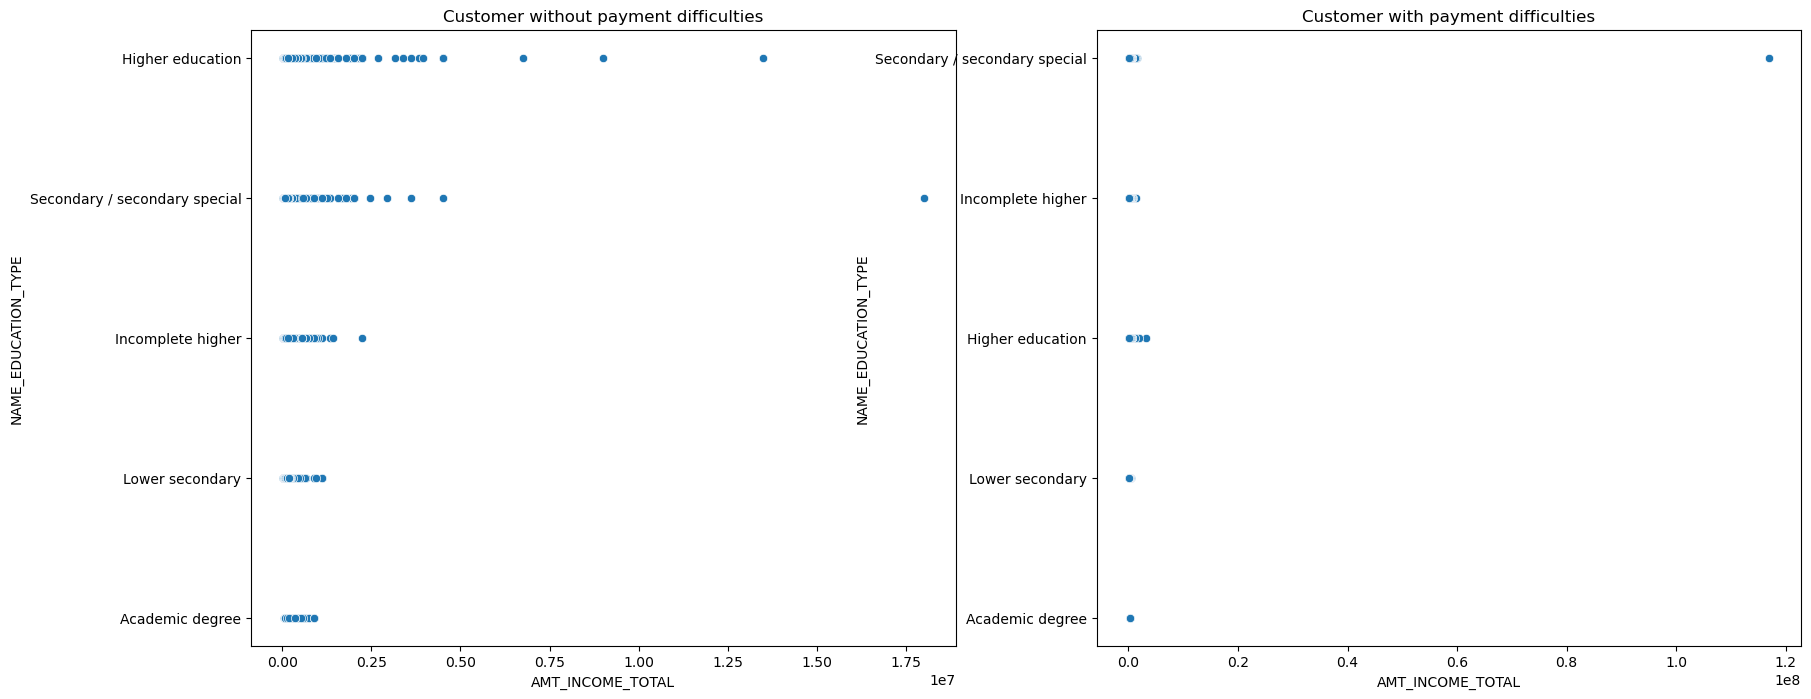

In [249]:
#Bivariate Analysis AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE
bivariate_analysis('AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE')

In [ ]:
####Insights
###people with higher education have higher income

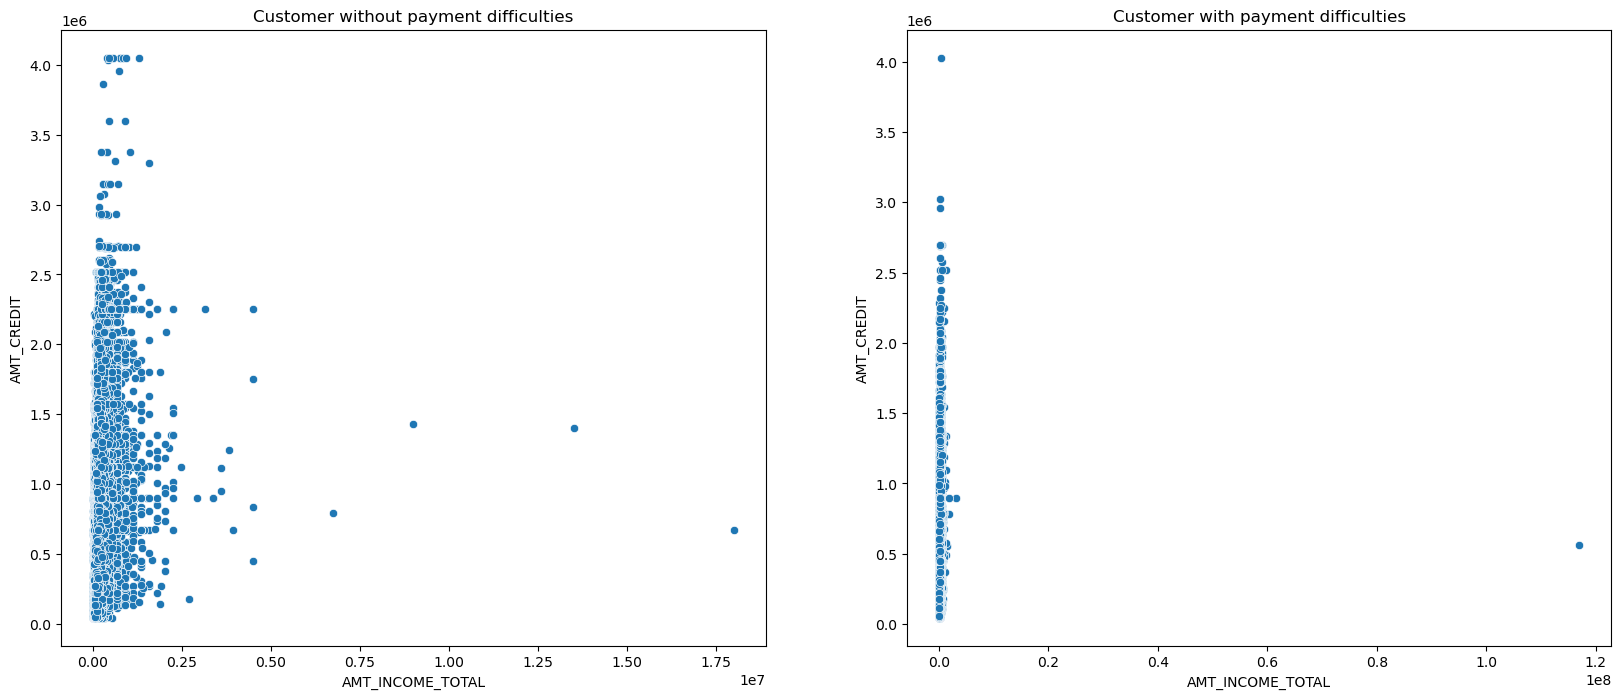

In [246]:
#Bivariate Analysis AMT_INCOME_TOTAL vs AMT_CREDIT
bivariate_analysis('AMT_INCOME_TOTAL','AMT_CREDIT')

In [ ]:
####Insights
###people with difficulty to pay have higher credit amount as compared to  their income.

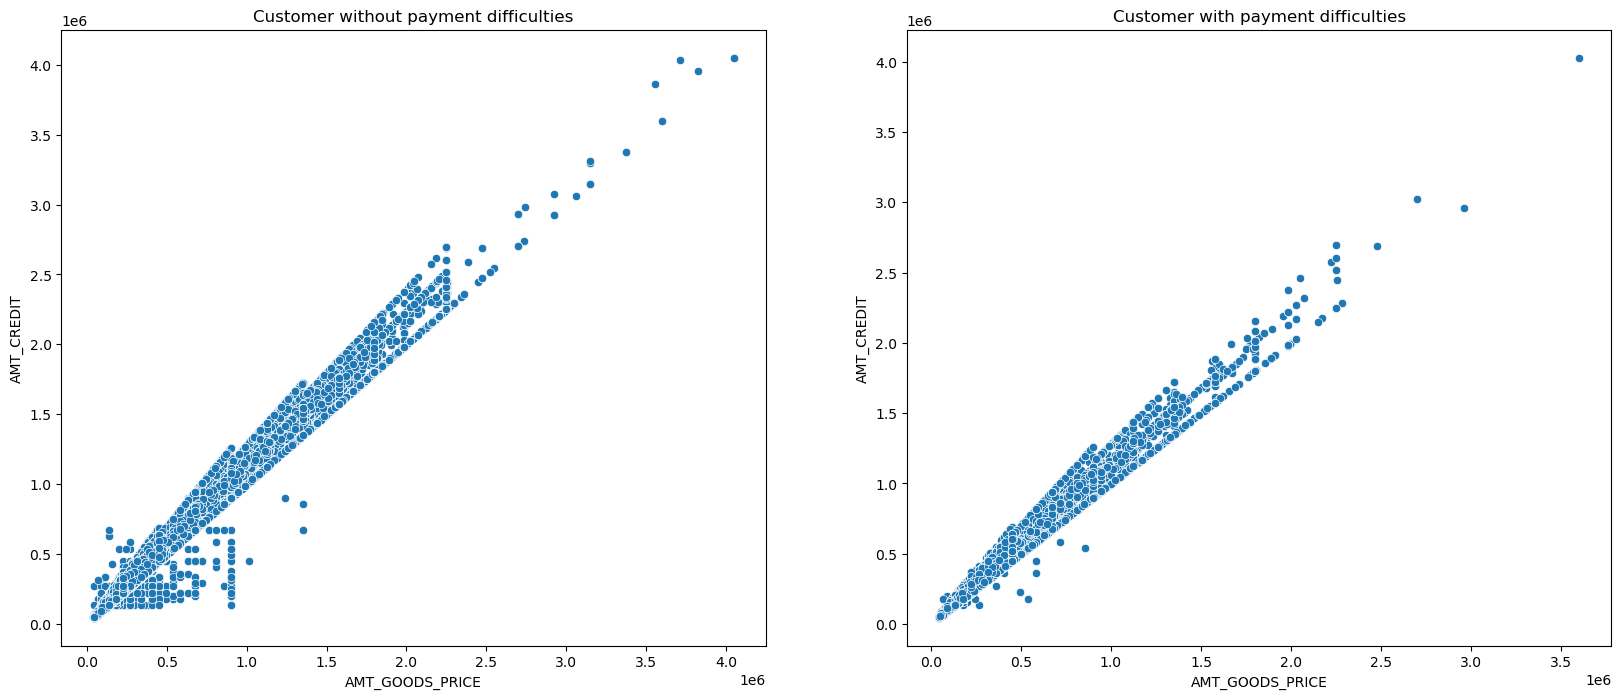

In [248]:
#Bivariate Analysis AMT_INCOME_TOTAL vs AMT_CREDIT
bivariate_analysis('AMT_GOODS_PRICE','AMT_CREDIT')

In [ ]:
####Insights
###very high correlation between AMT_GOODS_PRICE & AMT_CREDIT -> as AMT_GOODS_PRICE increases, so does AMT_CREDIT

In [282]:
# Getting the top 10 correlation for the Repayers data
repayer_columns = application_data_DF_0[[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]
#matrix of correlation between the above coulms
corr_repayer = repayer_columns.corr()
#In order to remove duplicate and self-correlation values
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
# Convert to 1-D series
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
#dropping null values
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
#converting negative correlation to positive
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
#sort correlation
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
#fetch first 10
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
90,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
275,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
367,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
436,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
68,AMT_ANNUITY,AMT_CREDIT,0.771309
160,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
247,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539005
269,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537301


In [284]:
# Getting the top 10 correlation for the Defaulters data
defaulter_columns = application_data_DF_1[[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]
#matrix of correlation between the above coulms
corr_defaulter = defaulter_columns.corr()
#In order to remove duplicate and self-correlation values
corr_defaulter = corr_defaulter.where(np.triu(np.ones(corr_defaulter.shape),k=1).astype(np.bool))
# Convert to 1-D series
corr_df_defaulter = corr_defaulter.unstack().reset_index()
corr_df_defaulter.columns =['VAR1','VAR2','Correlation']
#dropping null values
corr_df_defaulter.dropna(subset = ["Correlation"], inplace = True)
#converting negative correlation to positive
corr_df_defaulter["Correlation"]=corr_df_defaulter["Correlation"].abs() 
#sort correlation
corr_df_defaulter.sort_values(by='Correlation', ascending=False, inplace=True) 
#fetch first 10
corr_df_defaulter.head(10)

,VAR1,VAR2,Correlation
90,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
275,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
367,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
436,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
68,AMT_ANNUITY,AMT_CREDIT,0.752195
160,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
344,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497937
413,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.472052


In [ ]:
####Insights
### top 10 correlation factors for both defaulters and repaers are the same.

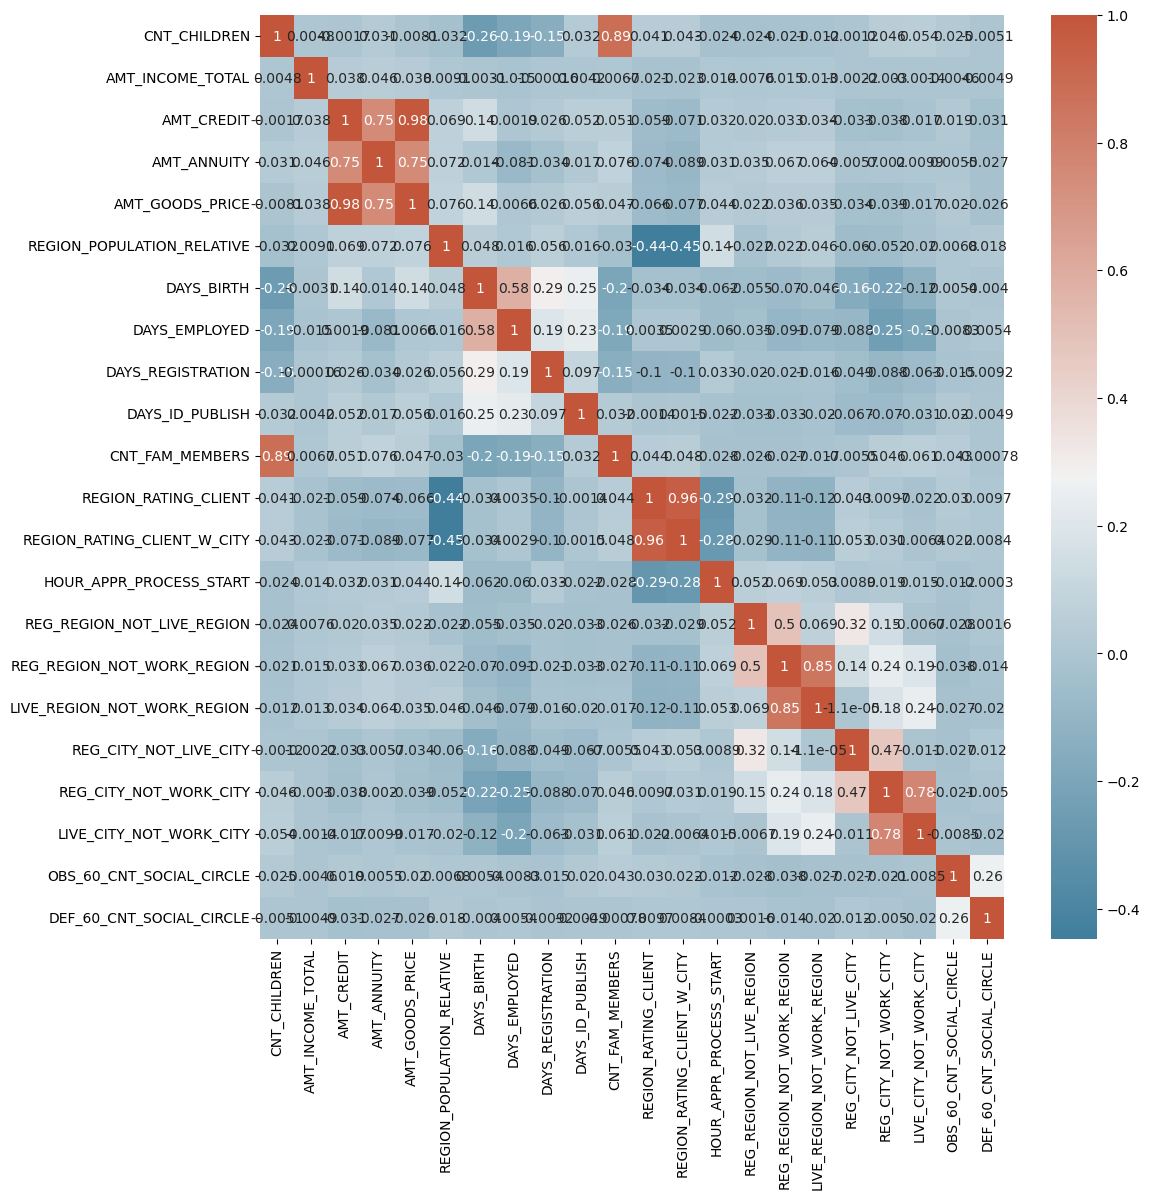

In [88]:
fig = plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(defaulter_columns.corr(),
            xticklabels=corr_defaulter.columns,
            yticklabels=corr_defaulter.columns,
            annot = True,
            cmap =cmap)

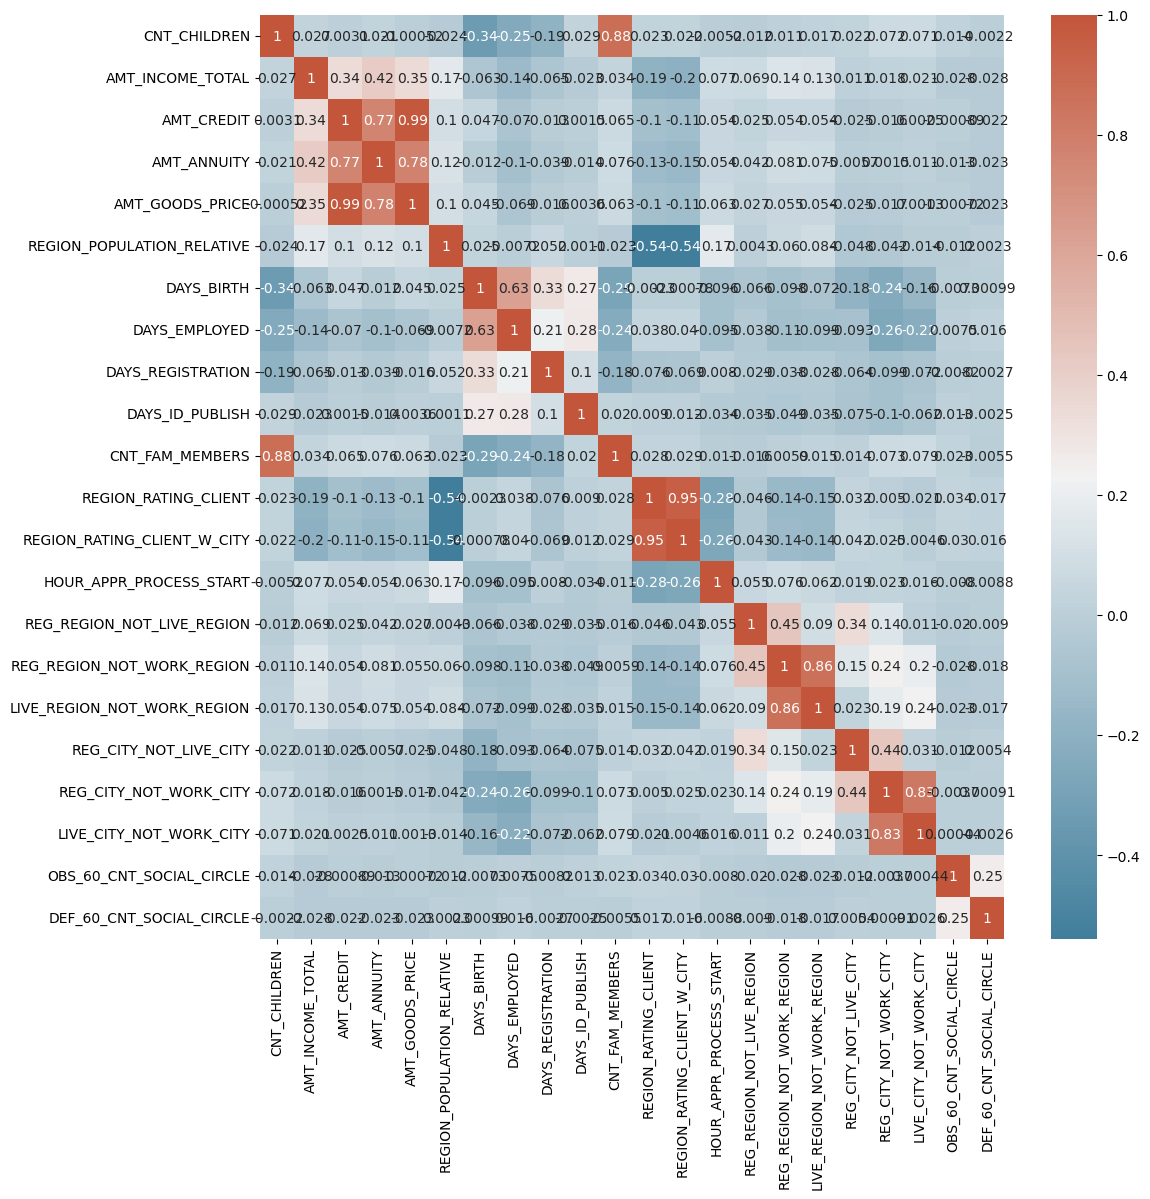

In [89]:
fig = plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(repayer_columns.corr(),
            xticklabels=corr_repayer.columns,
            yticklabels=corr_repayer.columns,
            annot = True,
            cmap =cmap)

In [104]:
#merged dataframe - application & previous DF
merged_DF = pd.merge(application_data_DF, previous_application_DF, how='inner', on='SK_ID_CURR')
merged_DF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AGE,AGE_GROUP,WORK_EXPERIENCE,WORK_EXPERIENCE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,45,40-50,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,52,50 above,0,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [105]:
merged_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1410175 non-null  object  
 12  NAME_INCOME_TYPE            

In [106]:
merged_DF['NAME_CONTRACT_STATUS'].value_counts()*100/len(merged_DF)

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

In [107]:
merged_approved_df = merged_DF[merged_DF['NAME_CONTRACT_STATUS']=='Approved']
merged_refused_df = merged_DF[merged_DF['NAME_CONTRACT_STATUS']=='Refused']
merged_canceled_df = merged_DF[merged_DF['NAME_CONTRACT_STATUS']=='Canceled']
merged_unused_df = merged_DF[merged_DF['NAME_CONTRACT_STATUS']=='Unused offer']

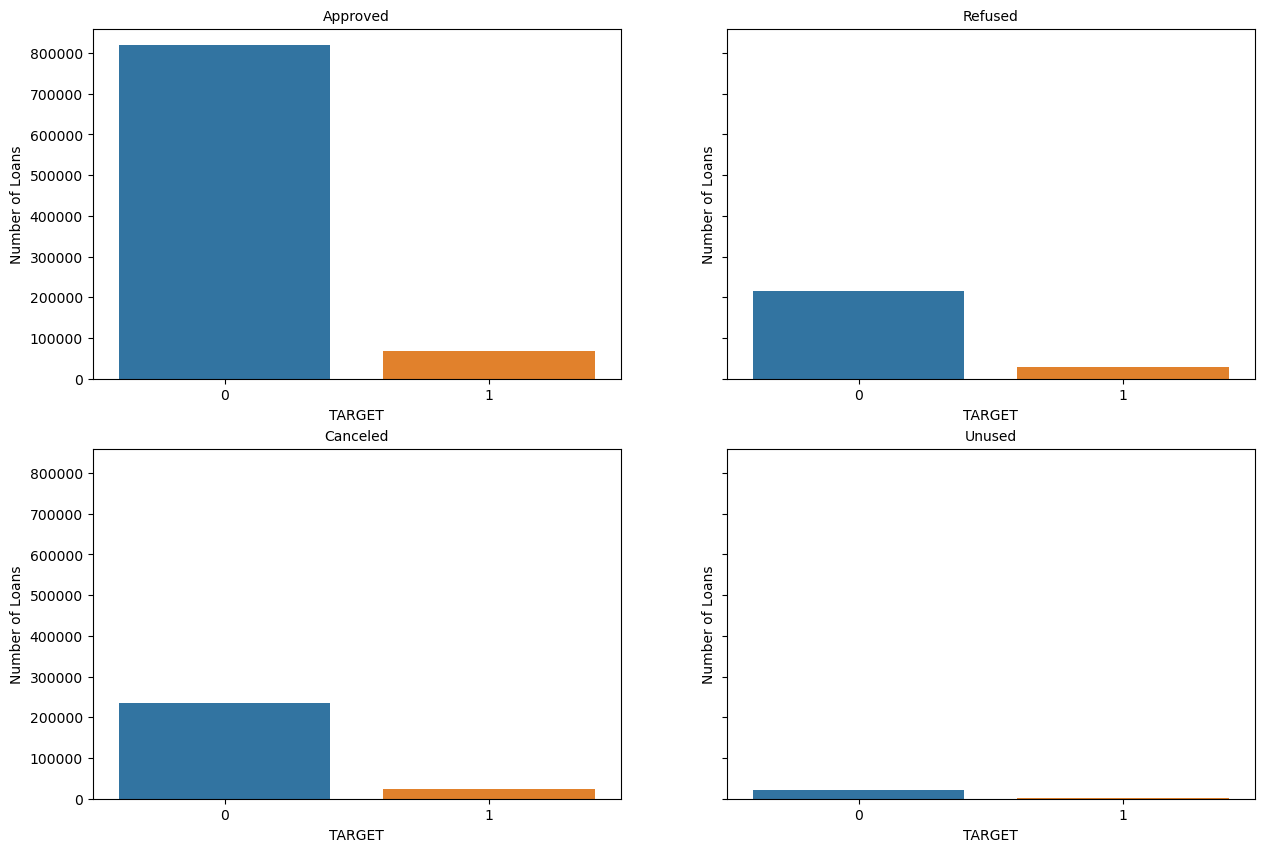

In [300]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)

ax1 = sns.countplot(ax=ax1,data=merged_approved_df,x='TARGET')
ax1.set_title("Approved", fontsize=10)
ax1.set_xlabel('TARGET')
ax1.set_ylabel("Number of Loans")
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2 = sns.countplot(ax=ax2,data=merged_refused_df,x='TARGET')
ax2.set_title("Refused", fontsize=10)
ax2.set_xlabel('TARGET')
ax2.set_ylabel("Number of Loans")
# ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

ax3 = sns.countplot(ax=ax3,data=merged_canceled_df,x='TARGET')
ax3.set_title("Canceled", fontsize=10)
ax3.set_xlabel('TARGET')
ax3.set_ylabel("Number of Loans")
# ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

ax4 = sns.countplot(ax=ax4,data=merged_unused_df,x='TARGET')
ax4.set_title("Unused", fontsize=10)
ax4.set_xlabel('TARGET')
ax4.set_ylabel("Number of Loans")
# ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#### applicants for whom previous loans were refused, have had no difficulty repaying their current loan on time

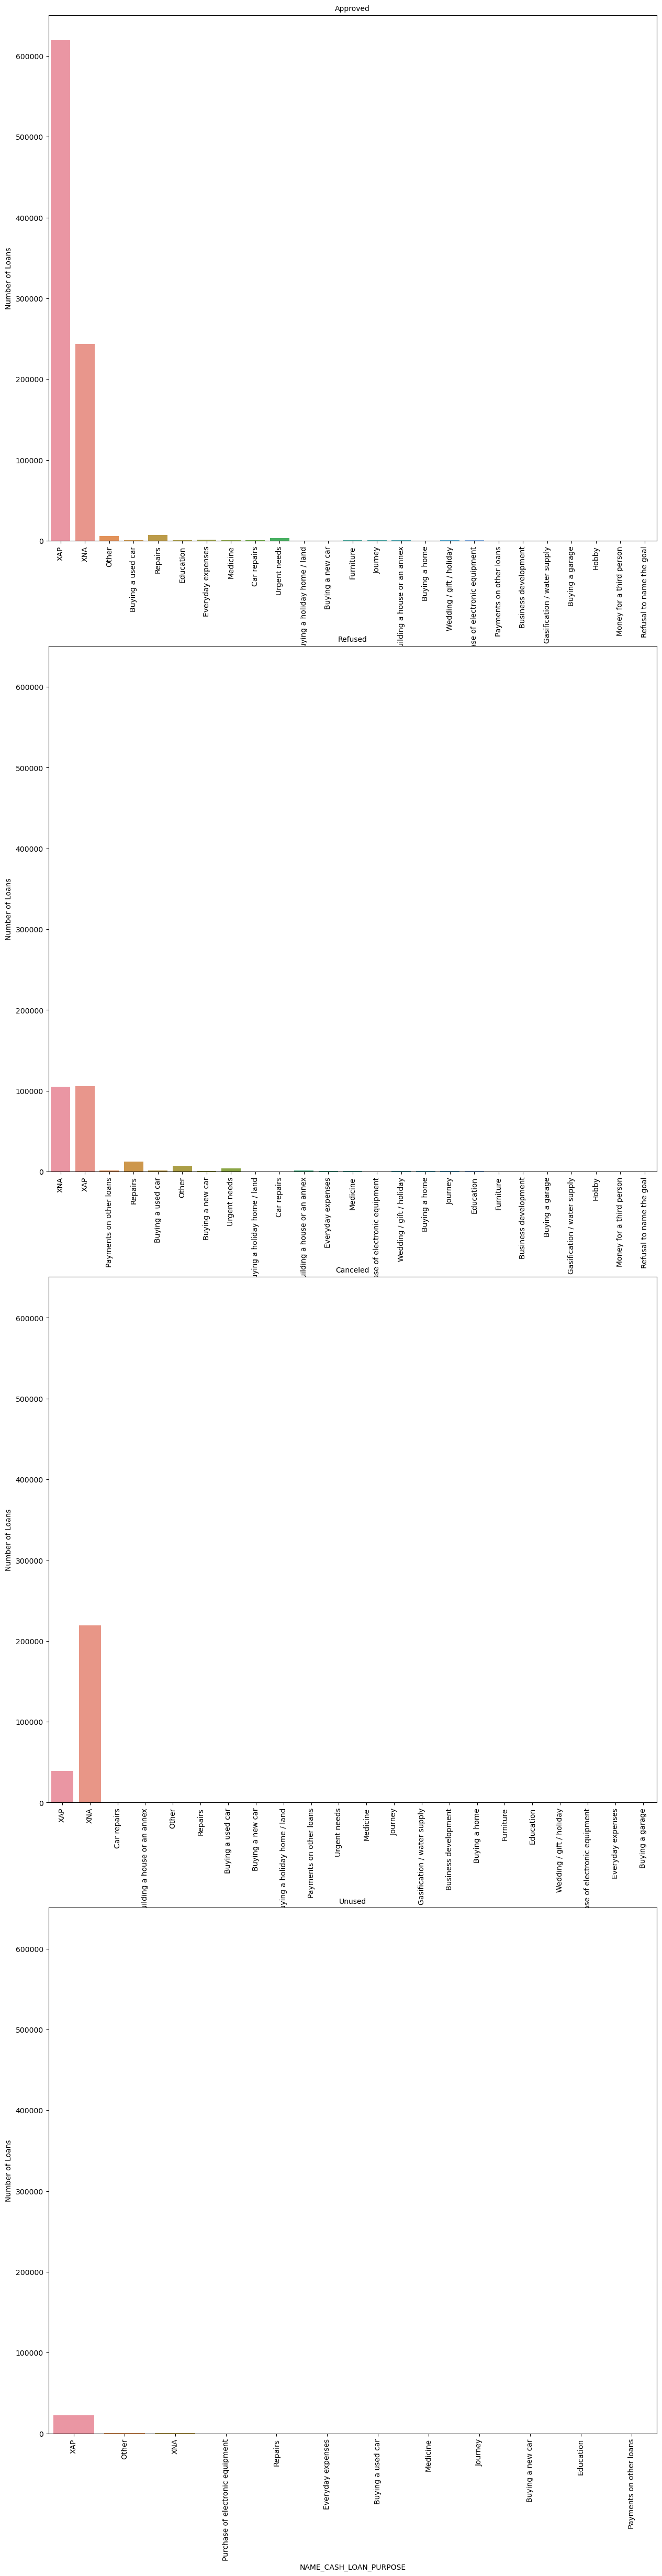

In [301]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(15,60),sharey=True)

ax1 = sns.countplot(ax=ax1,data=merged_approved_df,x='NAME_CASH_LOAN_PURPOSE')
ax1.set_title("Approved", fontsize=10)
ax1.set_xlabel('NAME_CASH_LOAN_PURPOSE')
ax1.set_ylabel("Number of Loans")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2 = sns.countplot(ax=ax2,data=merged_refused_df,x='NAME_CASH_LOAN_PURPOSE')
ax2.set_title("Refused", fontsize=10)
ax2.set_xlabel('NAME_CASH_LOAN_PURPOSE')
ax2.set_ylabel("Number of Loans")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

ax3 = sns.countplot(ax=ax3,data=merged_canceled_df,x='NAME_CASH_LOAN_PURPOSE')
ax3.set_title("Canceled", fontsize=10)
ax3.set_xlabel('NAME_CASH_LOAN_PURPOSE')
ax3.set_ylabel("Number of Loans")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

ax4 = sns.countplot(ax=ax4,data=merged_unused_df,x='NAME_CASH_LOAN_PURPOSE')
ax4.set_title("Unused", fontsize=10)
ax4.set_xlabel('NAME_CASH_LOAN_PURPOSE')
ax4.set_ylabel("Number of Loans") 
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
plt.show()

In [302]:
#### significant number of loans were refused for repairs 